# Market segmentation example

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

In [2]:
data = pd.read_csv ('3.12. Example.csv')

In [3]:
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


## Plot the data

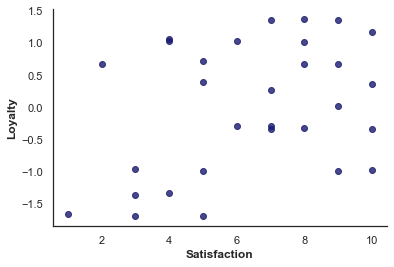

In [4]:
sns.set_style('white')
plt.scatter(data['Satisfaction'],
            data['Loyalty'],
            color='midnightblue',
            alpha=0.8)
plt.xlabel('Satisfaction',fontweight='bold')
plt.ylabel('Loyalty',fontweight='bold')
sns.despine()
plt.show()

## Select the features

In [5]:
x = data.copy()

## Clustering

In [6]:
kmeans = KMeans(2).fit(x)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Clustering results

In [7]:
clusters = x.copy()
clusters['Cluster'] = kmeans.fit_predict(x)

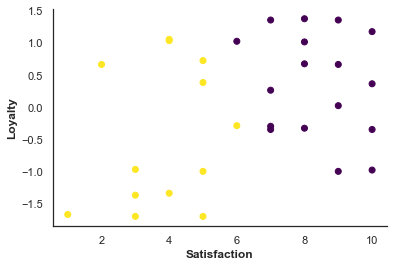

In [8]:
sns.set_style('white')
plt.scatter(clusters['Satisfaction'],
            clusters['Loyalty'],
            c=clusters['Cluster'],
            cmap='viridis')
plt.xlabel('Satisfaction',fontweight='bold')
plt.ylabel('Loyalty',fontweight='bold')
sns.despine()
plt.show()

## Standardize the variables

In [9]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

## Take advantage of the Elbow method

In [10]:
wcss = []

for i in range (1,10):
    kmeans = KMeans(i).fit(x_scaled)
    wcss.append(kmeans.inertia_)

In [11]:
wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.569489487091783,
 5.538868131545409,
 4.456070779602294,
 3.7523551963246464]

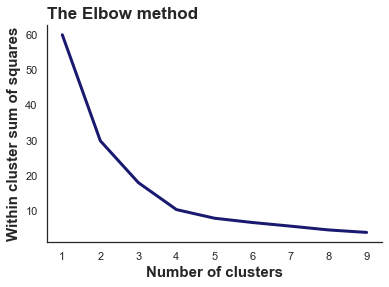

In [12]:
num_cluster = range(1,10)
plt.plot(num_cluster,
         wcss,
         color = 'midnightblue',
         lw = 3)
plt.title("The Elbow method",
          fontsize = 17,
          fontweight = 'bold',
          loc = 'left')
plt.xlabel('Number of clusters',
            fontsize = 15,
            fontweight = 'bold')
plt.ylabel('Within cluster sum of squares',
            fontsize = 15,
            fontweight = 'bold')
sns.despine()
plt.show()

In [13]:
kmeans_new = KMeans(4).fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster'] = kmeans_new.fit_predict(x_scaled)


In [14]:
clusters_new

,Satisfaction,Loyalty,cluster
0,4,-1.33,0
1,6,-0.28,2
2,5,-0.99,0
3,7,-0.29,2
4,4,1.06,1
5,1,-1.66,0
6,10,-0.97,2
7,8,-0.32,2
8,8,1.02,3
9,8,0.68,3


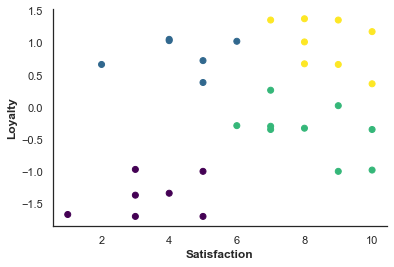

In [15]:
sns.set_style('white')
plt.scatter(clusters_new['Satisfaction'],
            clusters_new['Loyalty'],
            c=clusters_new['cluster'],
            cmap='viridis')
plt.xlabel('Satisfaction',fontweight='bold')
plt.ylabel('Loyalty',fontweight='bold')
sns.despine()
plt.show()

Зеленые - "отчужденные". Они неудовлетворены и имеют низкую лояльность.
Синие - "поддерживающие". Они имеют высокую лояльность, но при этом имеют среднее удовлетворение от бренда
Желтые - "фанаты бренда". Высокая лояльность и удовлетворение.
Фиолетовые - "проходимцы". Высокое удовлетворение и низкая лояльность.

 Основная задача увеличить количество фанатов бренда, для этого надо повлиять на удовлетворение, в первую очередь "поддерживающих", эффективные меры по повышению удовлетворения могут также повлиять на "отчужденных", что переведет их в кластер "проходимцев".
 Усиление лояльности "проходимцев" можно сделать с помощью акций, скидок, карт лояльности и тд. Такая стратегия также может увеличить количество поддерживающих за счет "отчужденных".